# Prediction of Quality of Wine
Firstly, I have done some exploration on the data using matplotlib and seaborn. Then, I use different classifier models to predict the quality of the wine.

1. Stochastic Gradient Descent Classifier
2. Support Vector Classifier(SVC)


Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree # importing this class for classfying using Decision Tree.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from math import sqrt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Using Regression, we will predict its quality lying between 0-10.

In [3]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [4]:
target = ['quality']

In [5]:
data.isnull().any() # checking for any null values, if there

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
x = data[features]
y = data[target]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=200) #splitting into traain and test data

In [8]:
regressor = LinearRegression()
regressor.fit(x_train, y_train) # fitting the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_prediction = regressor.predict(x_test)
print(y_prediction[:5])
print('*'*40)
print(y_test[:5]) #Predicting the values on test data

[[5.6362557 ]
 [5.73580131]
 [5.51754284]
 [5.48101339]
 [5.69866009]]
****************************************
      quality
366         7
1325        6
133         6
1418        5
1258        6


In [10]:
regressor = DecisionTreeRegressor(max_depth=10,min_samples_split=100)
regressor.fit(x_train, y_train) # Using Decision Trees regressor

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
y_prediction = regressor.predict(x_test)
print(y_prediction[:5]) #Perform prediction using decision tree regressor
print(y_test)

[6.09756098 5.65882353 5.49166667 5.12048193 5.66666667]
      quality
366         7
1325        6
133         6
1418        5
1258        6
...       ...
26          5
1257        6
717         5
1049        6
202         5

[528 rows x 1 columns]


In [12]:
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction)) #using RMSE

In [13]:
print(RMSE)

0.6377574835418577


When comparing two or more regression models, then the model with small RMSE will be better.

Predicting with different values to check the results of our trained model

In [14]:
predict = regressor.predict(np.array([7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8]).reshape(1,-1))

In [15]:
print(predict)

[5.12068966]


In [16]:
predict = regressor.predict(np.array([7.8,	0.58,	0.02,	2.0,	0.073,	9.0,	18.0,	0.9968,	3.36,	0.57,	9.5]).reshape(1,-1))

In [17]:
print(predict)

[5.49166667]


# Applying SGD classifier, to predict

**Firstly, we are getting all the information of our dataset**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Let's do some plotting to know how the data columns are distributed in the dataset**

**Using the loops concept, we plotted graphs wrt to each feature with the quality to check which feature actually plays an important role to determine the quality.**

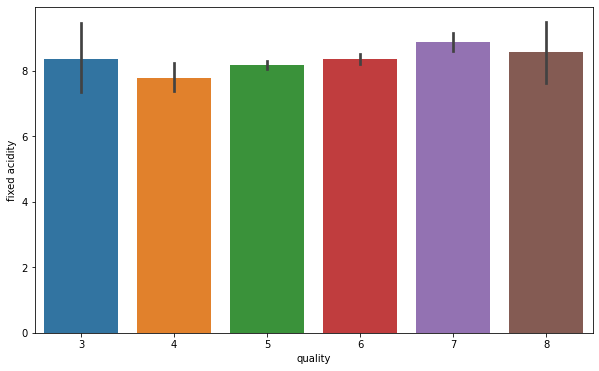

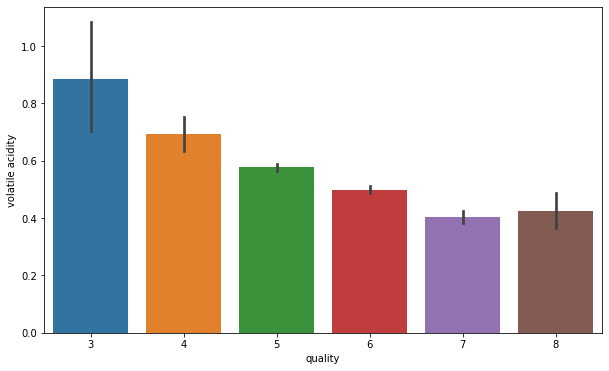

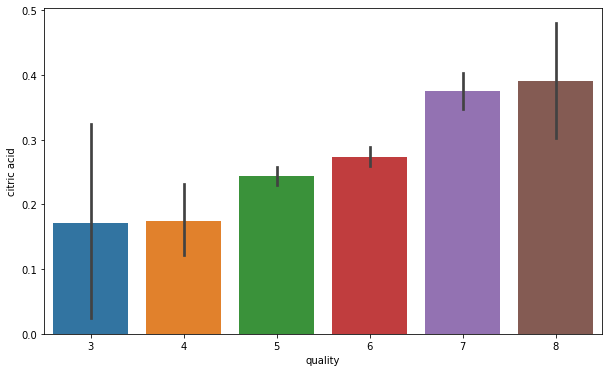

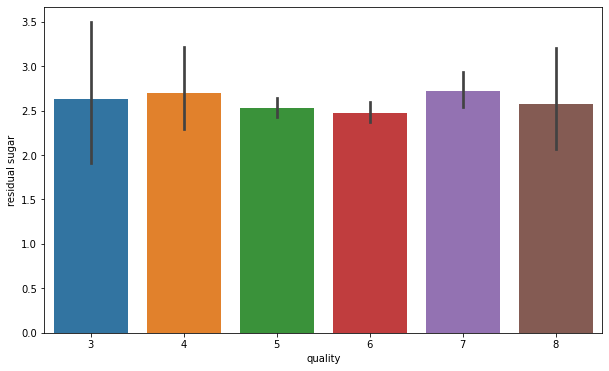

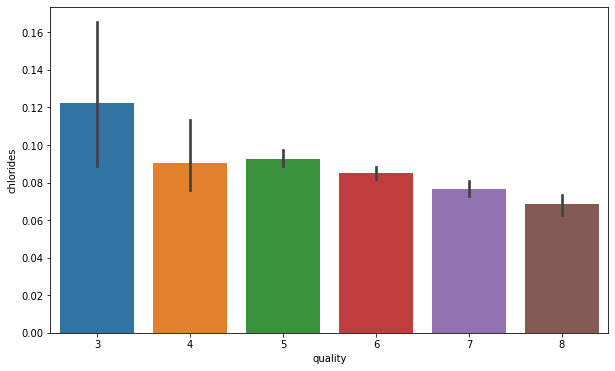

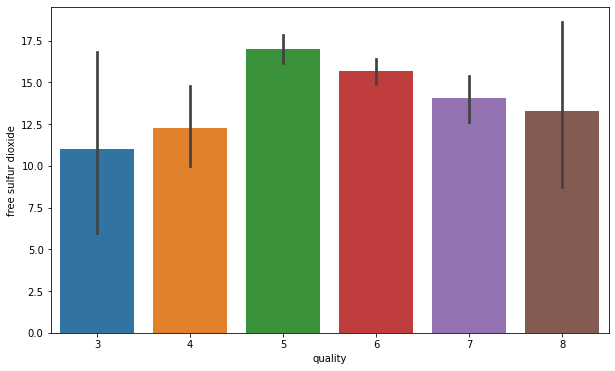

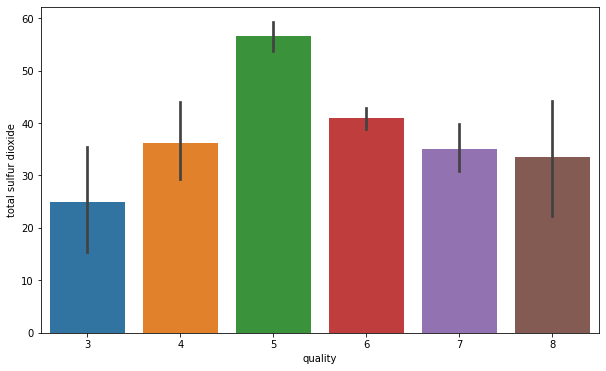

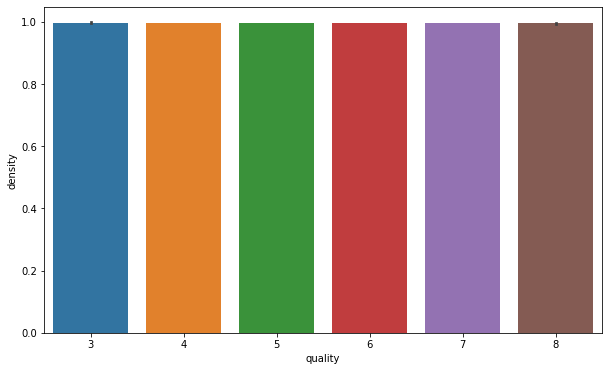

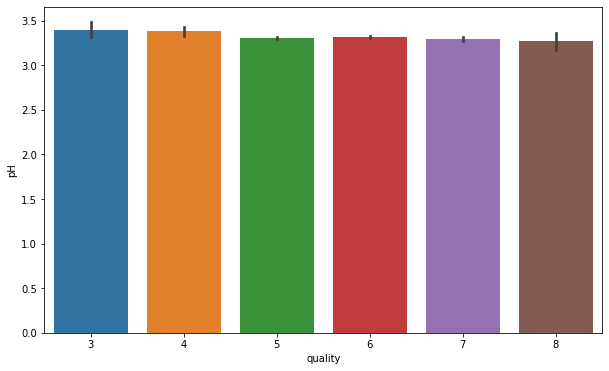

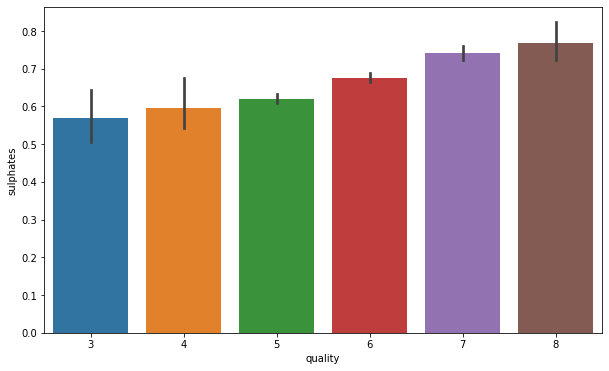

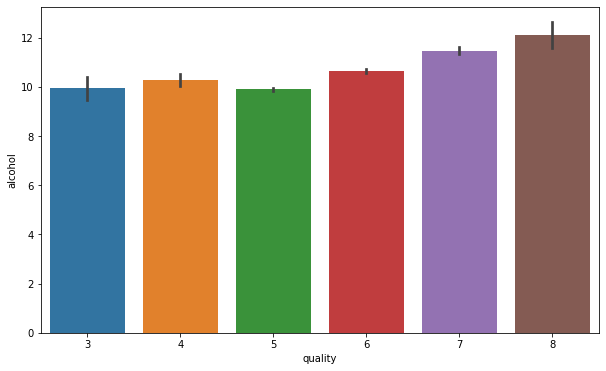

In [19]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for t in features:
  fig = plt.figure(figsize = (10,6))
  sns.barplot(x = 'quality', y = t, data = data)

Clearly, from the above graphs plots we can conclude that:
1. fixed acidity does not give any specification to classify the quality
2. its quite a downing trend in the volatile acidity as we go higher the quality 
3. Composition of citric acid go higher as we go higher in the quality of the wine
4. Composition of chloride also go down as we go higher in the quality of the wine
5. Sulphates level goes higher with the quality of wine
6. Alcohol level also goes higher as the quality of wine increases


## **Preprocessing Data for performing Machine learning algorithms**

In [20]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good'] 
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [21]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [22]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [23]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


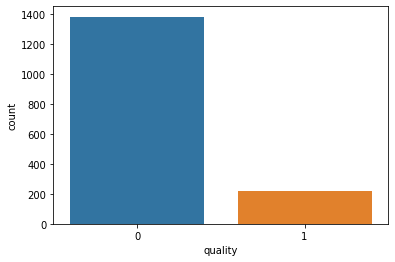

In [24]:
sns.countplot(data['quality'])

In [25]:
#Now seperate the dataset as response variable and feature variabes
X = data.drop('quality', axis = 1)
y = data['quality']

In [26]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Stochastic Gradient Decent Classifier

In [29]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [30]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       273
           1       0.42      0.45      0.43        47

    accuracy                           0.83       320
   macro avg       0.66      0.67      0.67       320
weighted avg       0.83      0.83      0.83       320



Accuracy is 84%

In [31]:
print(confusion_matrix(y_test, pred_sgd))

[[244  29]
 [ 26  21]]


# Support Vector Classifier

In [32]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [33]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support vector classifier gets 86%

# Let's try to increase our accuracy of models
**Grid Search CV**

In [34]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], # hyperparameters
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4] # hyperparameters
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [35]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [37]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



SVC improves from 86% to 90% using Grid Search CV